<a href="https://colab.research.google.com/github/PritishWadhwa/DL-Assignments/blob/master/Assignment1/Ques1/PTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# plt.style.use('dark_background')

In [40]:
class Perceptron():
    def __init__(self, X, y, numWeights, threshold, weights=None, maxIters=50, loadModel=False, modelName=None):
        trainOnes = np.ones((X.shape[0], 1))
        self.X = np.hstack((X, trainOnes))
        self.y = [1 if i == 1 else -1 for i in y]
        self.numWeights = numWeights
        self.threshold = threshold
        self.maxIters = maxIters
        if loadModel:
            pass
        else:
            if weights is not None:
                self.weights = weights
            else:
                self.weights = np.random.normal(0, 1, numWeights + 1)
            self.iters = 0
    
    def plotGraph(self):
        x1 = [i[0] for i in self.X]
        if self.X.shape[1] == 1:
            x2 = [0 for i in range(self.X[0])]
        else:
            x2 = [i[1] for i in self.X]
        plt.scatter(x1, x2, c=self.y, cmap='coolwarm')

        x_ = np.linspace(-1, 2, 100)
        y_ = -(self.weights[2] + self.weights[0]*x_)/self.weights[1]
        plt.plot(x_, y_, 'r')

        plt.show()

    def updateWeights(self):
        for i in range(len(self.X)):
            if self.y[i]*np.dot(self.weights, self.X[i]) <= self.threshold:
                self.weights += (self.y[i] * self.X[i])
                return

    def checkConvergence(self):
        for i in range(len(self.X)):
            if self.y[i]*np.dot(self.weights, self.X[i]) <= self.threshold:
                return False
        return True

    def train(self):
        steps = 0
        while steps < self.maxIters:
            steps += 1
            self.iters += 1
            print(f'\nEpoch number: {self.iters}\nWeights: {self.weights}')
            self.plotGraph()
            if self.checkConvergence() == False:
                self.updateWeights()
            else:
                return


In [41]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [42]:
p = Perceptron(X, y, 2, 0, weights=[3,2,1])
print(p.weights)
print(p.X)
print(p.y)

[3, 2, 1]
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
[-1, -1, -1, 1]



Epoch number: 1
Weights: [3, 2, 1]


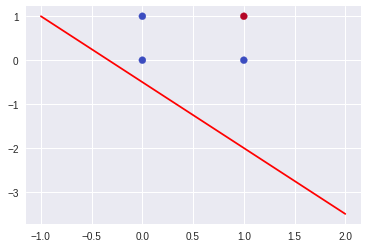


Epoch number: 2
Weights: [3. 2. 0.]


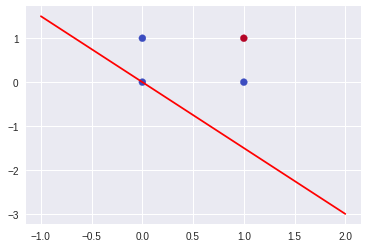


Epoch number: 3
Weights: [ 3.  2. -1.]


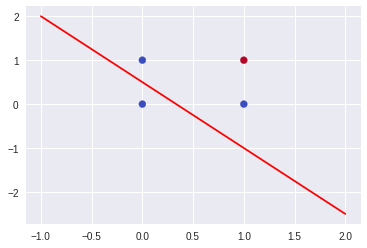


Epoch number: 4
Weights: [ 3.  1. -2.]


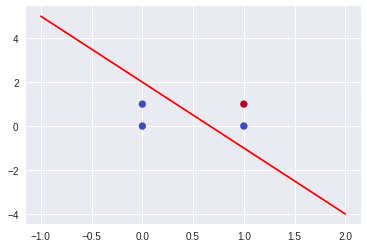


Epoch number: 5
Weights: [ 2.  1. -3.]


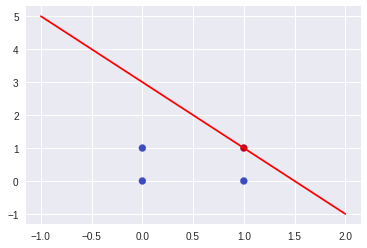


Epoch number: 6
Weights: [ 3.  2. -2.]


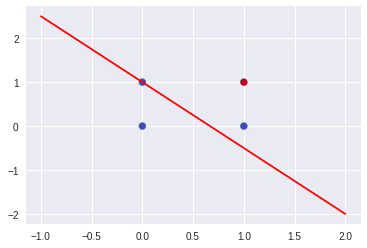


Epoch number: 7
Weights: [ 3.  1. -3.]


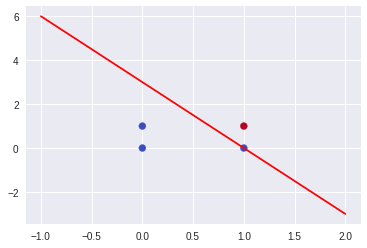


Epoch number: 8
Weights: [ 2.  1. -4.]


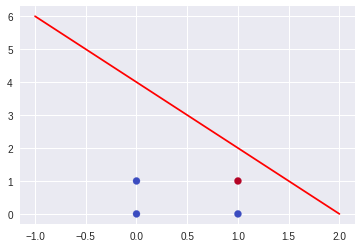


Epoch number: 9
Weights: [ 3.  2. -3.]


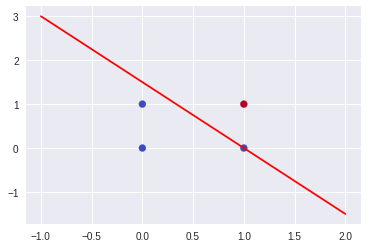


Epoch number: 10
Weights: [ 2.  2. -4.]


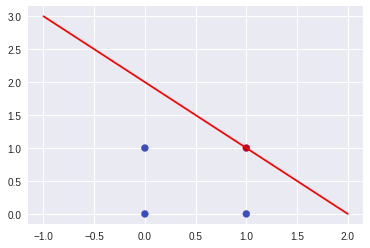


Epoch number: 11
Weights: [ 3.  3. -3.]


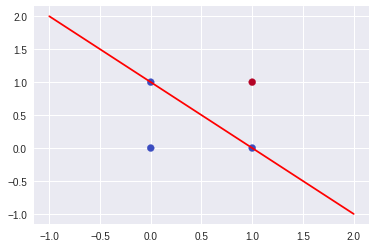


Epoch number: 12
Weights: [ 3.  2. -4.]


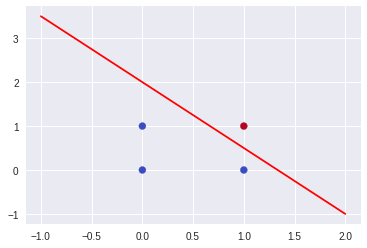

In [43]:
p.train()

In [44]:
print(p.weights)
print(p.X)
print(p.y)
print(p.threshold)

[ 3.  2. -4.]
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
[-1, -1, -1, 1]
0
